In [1]:

from pathlib import Path
if(Path("./data").exists()):
    base_dir = Path("./")
else:
    base_dir = Path("../../")
print(base_dir.absolute())

data_dir = base_dir / "data"
input_dir = data_dir / "input"
output_dir =  data_dir / "output"
genes_dir = input_dir / "genes"
expressions_dir = input_dir / "expressions"
samples_dir = input_dir / "samples"


/data/sources/species/pipeline/notebooks/../..


In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
for d in genes_dir.iterdir():
    print(d)

../../data/input/genes/species_genes.tsv
../../data/input/genes/mammals_genes.tsv


In [4]:
species_genes = pd.read_csv(genes_dir / "species_genes.tsv", sep="\t")
mammals_genes = pd.read_csv(genes_dir / "mammals_genes.tsv", sep="\t")

In [5]:
species_genes.isnull()

,Homo_sapiens,Coturnix_japonica,Cyanistes_caeruleus,Gallus_gallus,Meleagris_gallopavo,Parus_major,Strigops_habroptila,Taeniopygia_guttata,Zonotrichia_albicollis,Ailuropoda_melanoleuca,Bos_grunniens,Bos_taurus,Callithrix_jacchus,Capra_hircus,Cavia_aperea,Cavia_porcellus,Equus_caballus,Erinaceus_europaeus,Felis_catus,Heterocephalus_glaber,Macaca_fascicularis,Macaca_mulatta,Macaca_nemestrina,Meriones_unguiculatus,Mesocricetus_auratus,Microcebus_murinus,Monodelphis_domestica,Mus_caroli,Mus_musculus,Mus_spicilegus,Ornithorhynchus_anatinus,Oryctolagus_cuniculus,Otolemur_garnettii,Ovis_aries,Pan_paniscus,Pan_troglodytes,Phascolarctos_cinereus,Rattus_norvegicus,Rhinolophus_ferrumequinum,Rhinopithecus_bieti,Sarcophilus_harrisii,Suricata_suricatta,Sus_scrofa,Tupaia_belangeri,Tursiops_truncatus,Ursus_americanus,Anolis_carolinensis,Gopherus_agassizii,Pogona_vitticeps,Callorhinchus_milii,Latimeria_chalumnae,Betta_splendens,Clupea_harengus,Electrophorus_electricus,Esox_lucius,Neogobius_melanostomus,Scophthalmus_maximus
0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,True,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True,False,False,False,False,False,False,True,False,True,False,False,False,True,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21144,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
21145,False,True,True,True,True,True,True,True,True,True,False,False,False,False,True,True,False,True,False,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
21146,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
21147,False,False,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,T

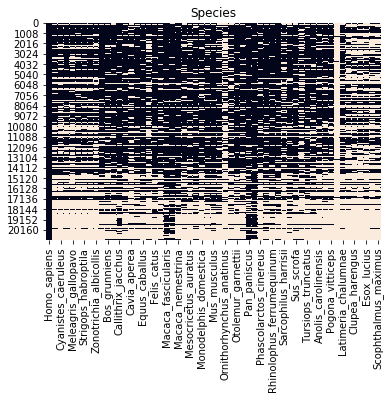

In [6]:
sns.heatmap(species_genes.isnull(), cbar=False)
plt.title("Species")
plt.show()

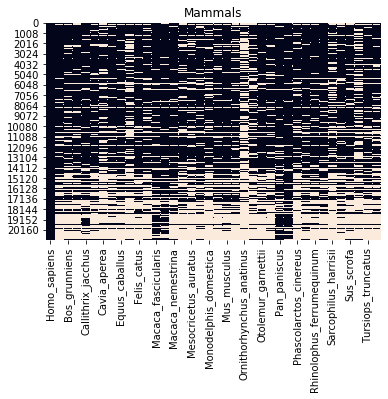

In [7]:
sns.heatmap(mammals_genes.isnull(), cbar=False)
plt.title("Mammals")
plt.show()

In [34]:
one2one = pd.read_csv("/data/species/test_one2one.tsv", sep="\t")
one2many = pd.read_csv("/data/species/test_one2many.tsv", sep="\t")
many2many = pd.read_csv("/data/species/test_many2many.tsv", sep="\t")
all_together = pd.read_csv("/data/species/test_all.tsv", sep="\t")


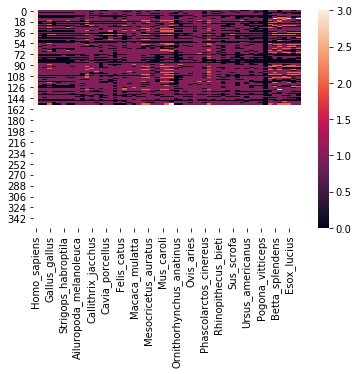

In [65]:
def process(df: pd.DataFrame) -> pd.DataFrame:
    return df.notnull().astype(int)

all_summed = process(one2one) + process(one2many) + process(many2many)
sns.heatmap(all_summed)

In [42]:
sm = all_together.isnull().exclude(isnull=True)  + one2one.isnull().exclude(isnull=True)  + one2many.isnull().exclude(isnull=True)  + many2many.isnull() 
sm

,Homo_sapiens,Coturnix_japonica,Cyanistes_caeruleus,Gallus_gallus,Meleagris_gallopavo,Parus_major,Strigops_habroptila,Taeniopygia_guttata,Zonotrichia_albicollis,Ailuropoda_melanoleuca,Bos_grunniens,Bos_taurus,Callithrix_jacchus,Capra_hircus,Cavia_aperea,Cavia_porcellus,Equus_caballus,Erinaceus_europaeus,Felis_catus,Heterocephalus_glaber,Macaca_fascicularis,Macaca_mulatta,Macaca_nemestrina,Meriones_unguiculatus,Mesocricetus_auratus,Microcebus_murinus,Monodelphis_domestica,Mus_caroli,Mus_musculus,Mus_spicilegus,Ornithorhynchus_anatinus,Oryctolagus_cuniculus,Otolemur_garnettii,Ovis_aries,Pan_paniscus,Pan_troglodytes,Phascolarctos_cinereus,Rattus_norvegicus,Rhinolophus_ferrumequinum,Rhinopithecus_bieti,Sarcophilus_harrisii,Suricata_suricatta,Sus_scrofa,Tupaia_belangeri,Tursiops_truncatus,Ursus_americanus,Anolis_carolinensis,Gopherus_agassizii,Pogona_vitticeps,Callorhinchus_milii,Latimeria_chalumnae,Betta_splendens,Clupea_harengus,Electrophorus_electricus,Esox_lucius,Neogobius_melanostomus,Scophthalmus_maximus
0,0,2,2,2,2,2,2,2,2,2,2,4,2,2,2,2,4,4,2,2,2,2,2,2,4,2,4,2,2,2,4,4,2,2,2,2,4,2,2,2,4,2,2,2,2,2,2,2,2,4,2,2,2,2,2,2,2
1,0,2,2,2,2,2,2,2,2,2,2,2,2,2,4,4,2,2,2,2,2,2,2,2,2,2,4,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,4,4,2,2,2,4,2,2,4,2,2,4,2
2,0,2,2,2,2,2,2,2,2,2,2,2,4,2,2,2,2,2,2,4,4,2,4,2,4,2,2,2,2,2,2,4,2,2,2,2,4,2,4,4,2,2,4,2,2,2,2,4,4,4,2,2,4,2,2,2,2
3,0,2,2,2,2,2,2,2,2,2,2,2,2,4,2,2,2,4,4,4,2,2,4,2,2,2,2,2,2,2,2,2,4,2,2,2,2,2,2,2,2,2,2,2,4,2,2,2,2,4,2,2,2,1,2,2,2
4,0,4,4,4,4,4,4,4,4,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,4,2,2,2,2,2,4,2,2,2,4,2,2,4,2,2,2,4,2,4,4,4,4,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
396,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
397,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
False + False + True + True

2

TypeError: '>' not supported between instances of 'str' and 'int'

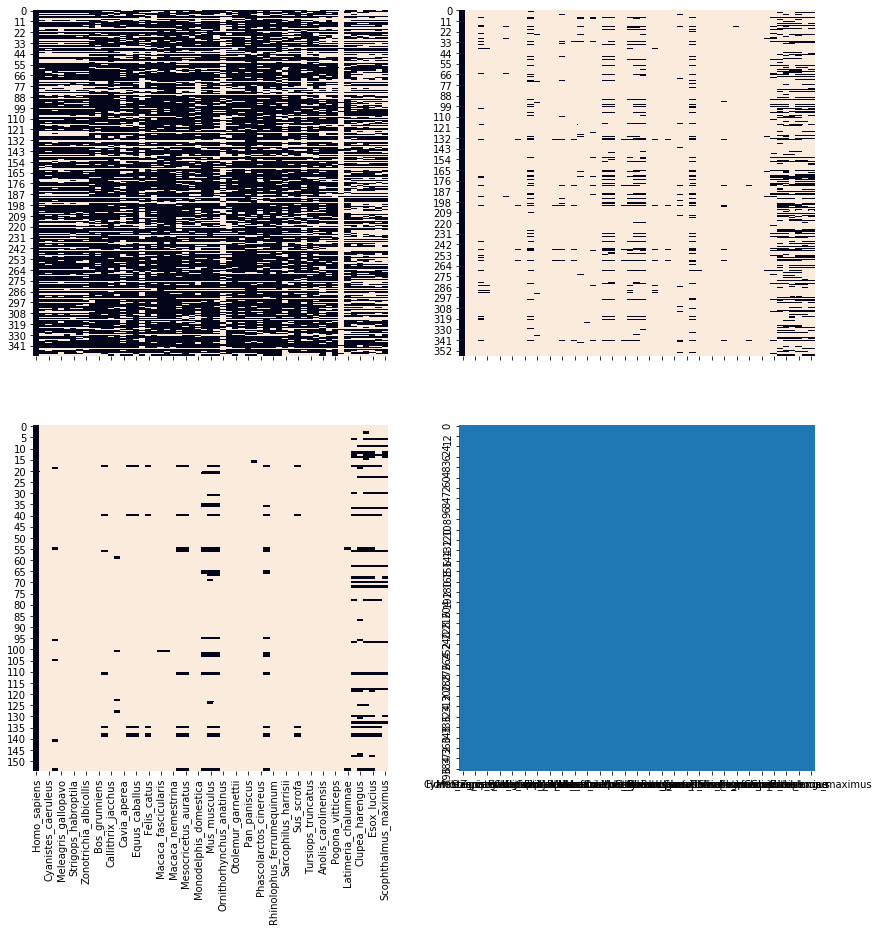

In [45]:
f, axes = plt.subplots(2, 2, figsize=(14, 14), sharex=True)
sns.heatmap(one2one.isnull(), ax=axes[0, 0], cbar=False)
sns.heatmap(one2many.isnull(), ax=axes[0, 1], cbar=False)
sns.heatmap(many2many.isnull(), ax=axes[1, 0], cbar=False)
sns.heatmap(sm, ax=axes[1, 1], cbar=False)